<a href="https://colab.research.google.com/github/lisatwyw/data-gym/blob/master/OpenCanada_COVID19.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import pandas as pd 

! wget -O covid19.csv  https://health-infobase.canada.ca/src/data/covidLive/covid19.csv

d=pd.read_csv('covid19.csv')


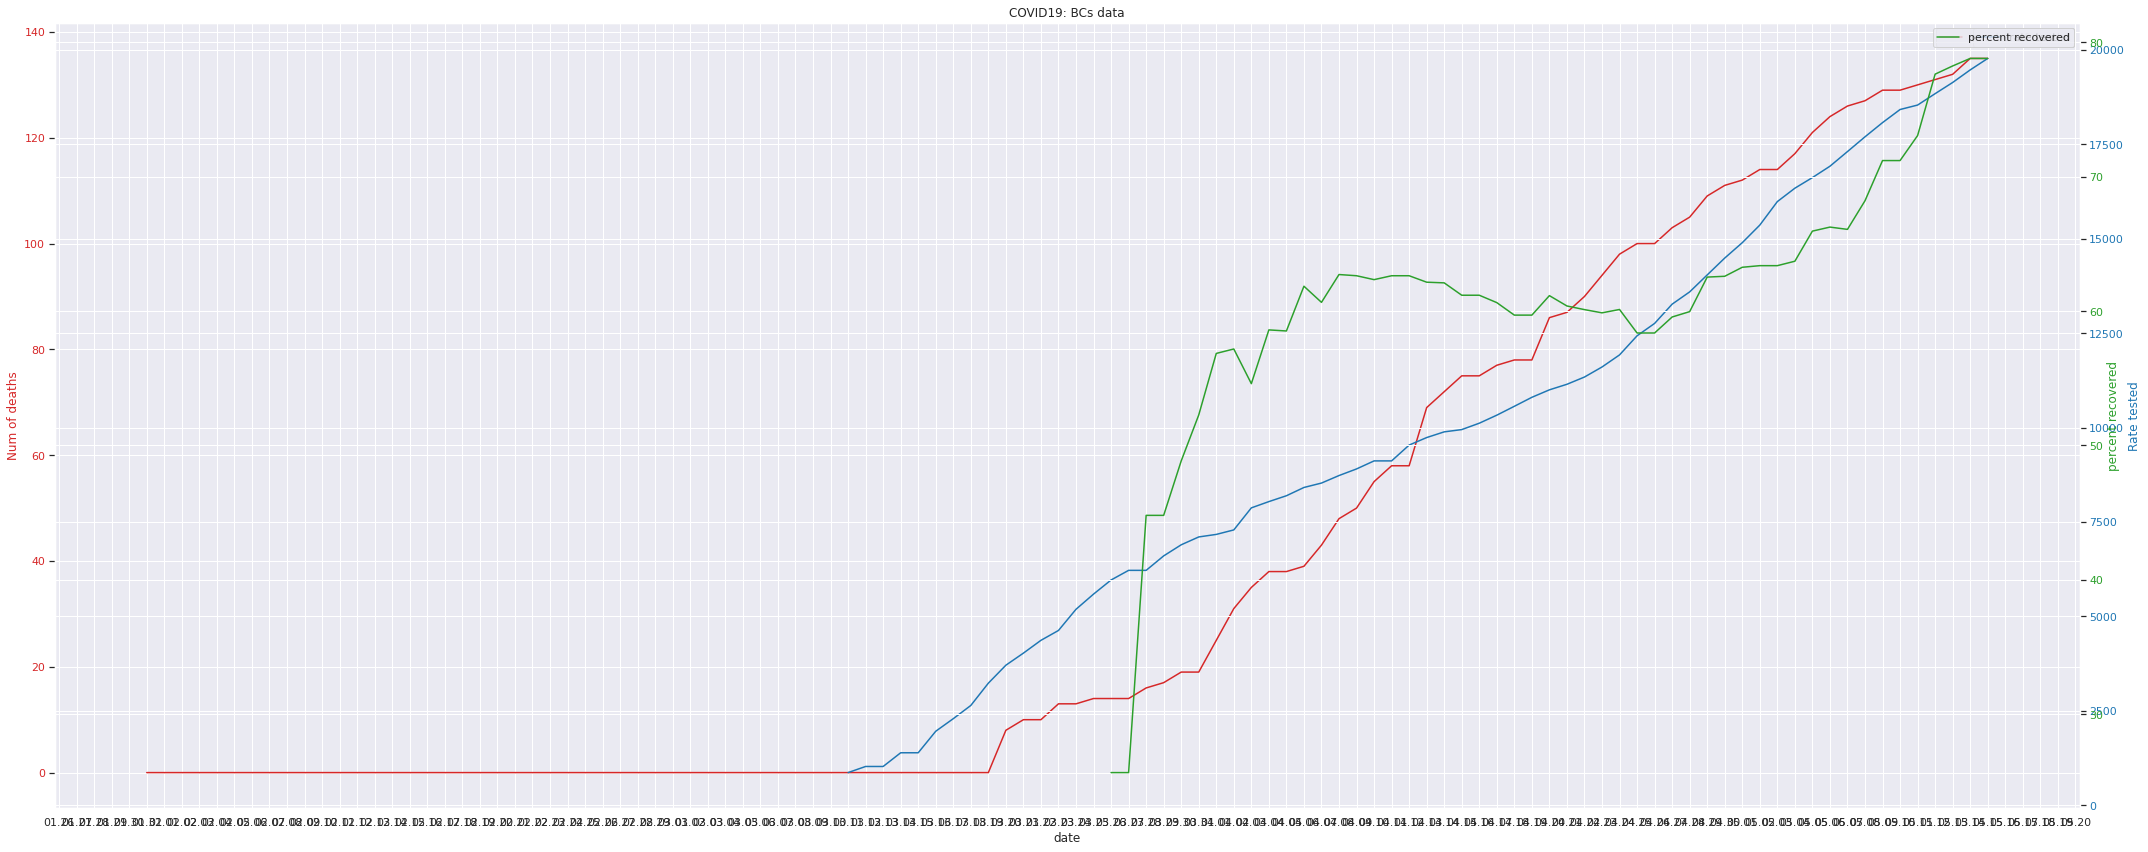

In [16]:
import matplotlib.pyplot as plt

import numpy as np
import datetime

q = np.where(d['pruid']==59 )[0]
x = d['date'].values[q]
x_vals = [datetime.datetime.strptime(dd,"%d-%m-%Y").date() for dd in x]


import seaborn as sns
sns.set(style="darkgrid")

fig, ax1 = plt.subplots(figsize=(30,12))

color = 'tab:red'
ax1.set_xlabel('date')
ax1.set_ylabel('Num of deaths', color=color)
ax1.plot(x_vals, d['numdeaths'].values[q], color=color, label='number of deaths' )
ax1.tick_params(axis='y', labelcolor=color)

ax2 = ax1.twinx()  # instantiate a second axes that shares the same x-axis
color = 'tab:blue'
ax2.set_ylabel('Rate tested', color=color)  # we already handled the x-label with ax1
ax2.plot(x_vals,  d['ratetested'].values[q], color=color, label='rate tested' )
ax2.tick_params(axis='y', labelcolor=color)

ax3 = ax1.twinx()  # instantiate a second axes that shares the same x-axis
color = 'tab:green'
ax3.set_ylabel('percent recovered', color=color)  # we already handled the x-label with ax1
ax3.plot(x_vals,  d['percentrecover'].values[q], color=color, label='percent recovered')
ax3.tick_params(axis='y', labelcolor=color)


import matplotlib.dates as mdates  
    
formatter = mdates.DateFormatter("%m.%d")

ax3.xaxis.set_major_formatter(formatter)
locator = mdates.DayLocator()
ax3.xaxis.set_major_locator(locator)


plt.title('COVID19: BC''s data')
ax1.legend()
ax2.legend()
ax3.legend()

fig.tight_layout() 
plt.show()

# fig.savefig('OpenCanada_BC_COVID19.pdf')
